## Data Preprocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

ev_data.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [9]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17365 entries, 0 to 17364
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         17365 non-null  object 
 1   Country                                            17365 non-null  object 
 2   City                                               17365 non-null  object 
 3   State                                              17365 non-null  object 
 4   Postal Code                                        17365 non-null  int64  
 5   Model Year                                         17365 non-null  int64  
 6   Make                                               17365 non-null  object 
 7   Model                                              17364 non-null  object 
 8   Electric Vehicle Type                              17364 non-null  object 
 9   Clean 

In [10]:
ev_data.isnull().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,1
Electric Vehicle Type,1
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1


In [11]:
ev_data = ev_data.dropna()

## EV Adoption Over Time

In [12]:
sns.set_style("whitegrid")

<ipython-input-15-19c2b20ba137>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


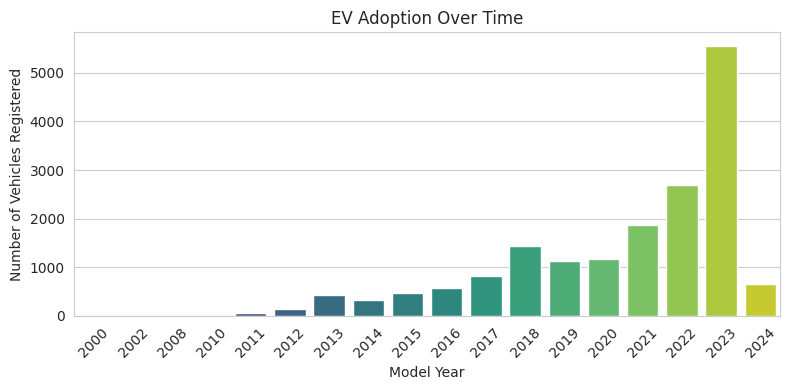

In [15]:
plt.figure(figsize=(8, 4))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those countries:

In [20]:
# geographical distribution at county level
ev_country_distribution = ev_data['Country'].value_counts()
top_countries = ev_country_distribution.head(3).index

In [22]:
# filtering the dataset for these top counties
top_countries_data = ev_data[ev_data['Country'].isin(top_countries)]

In [25]:
# analyzing the distribution of EVs within the cities of these top countries
ev_city_distribution_top_countries = top_countries_data.groupby(['Country', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [27]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_countries.head(10)

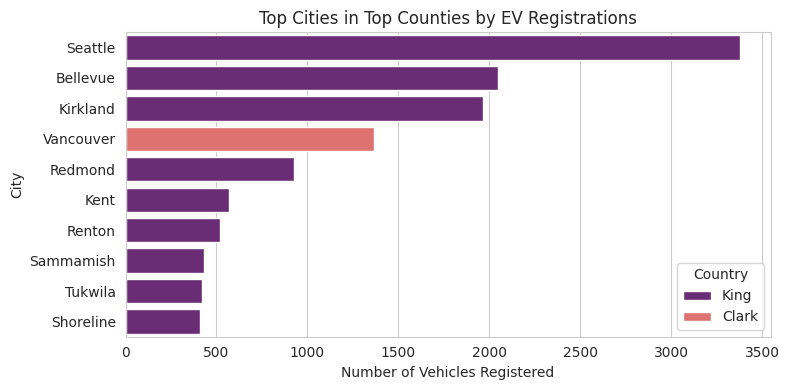

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Number of Vehicles', y='City', hue='Country', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## The types of electric vehicles represented in this dataset.

In [32]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

<ipython-input-34-1eb1e60f740a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= ev_type_distribution.values, y= ev_type_distribution.index, palette="rocket")


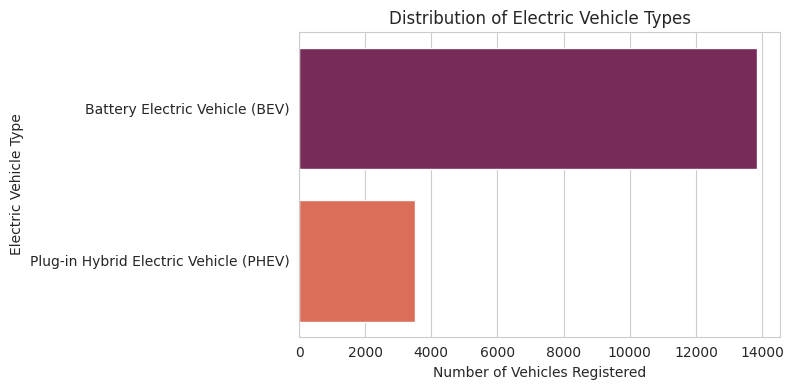

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(x= ev_type_distribution.values, y= ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

## Popularity of electric vehicle manufacturers and models among the registered vehicles.


In [36]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

<ipython-input-38-ed0ac91a1814>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


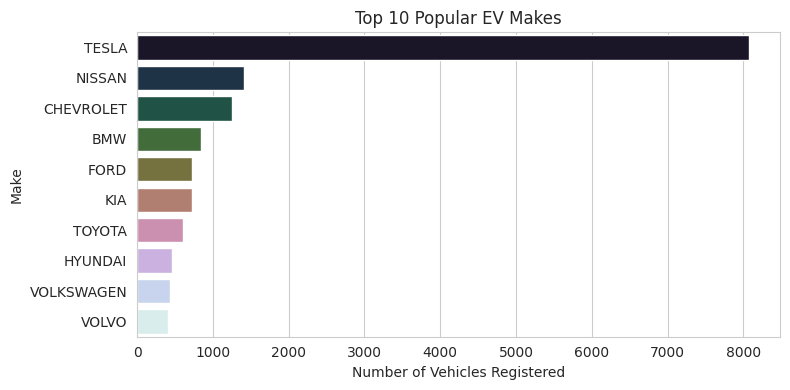

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

## Explore the electric range of vehicles

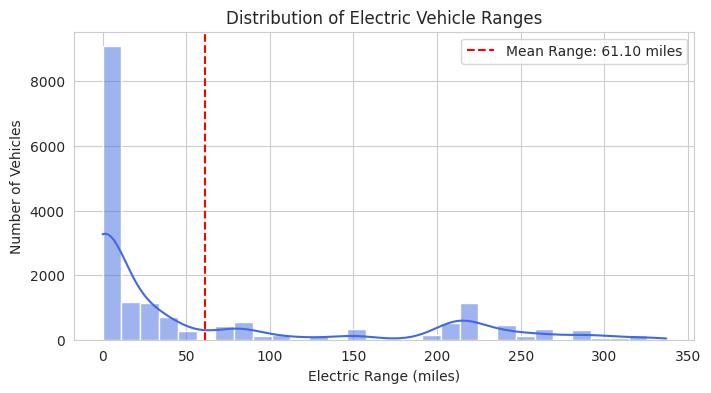

In [41]:
# analyzing the distribution of electric range
plt.figure(figsize=(8, 4))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

## explore how electric ranges vary among the top manufacturers and models.

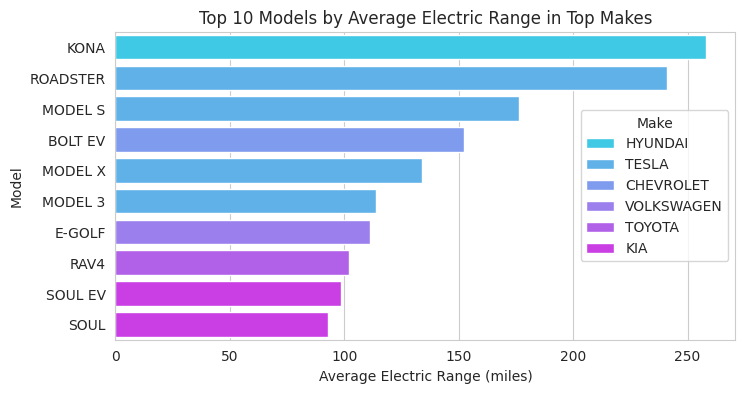

In [51]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(8, 4))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()